In [ ]:
import tensorflow as tf

In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
from imutils import paths
import os
import time
import random
from keras.preprocessing.image import img_to_array

data=[]
labels=[]
i=1

In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Datasets/dataset1")))
print(imagePaths)
for imagePath in imagePaths:
  if i%50==0:
    print(i)
  i+=1
  image = cv2.imread(imagePath)
  image = cv2.resize(image,(50, 50))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = img_to_array(image)
  label = imagePath.split(os.path.sep)[-2]
  if label=="with_mask":
    label=0
    d.append((image,label))
  elif label=="without_mask":
    label=1
    d.append((image,label))

In [ ]:
random.shuffle(d)

To use the same shuffled data for all cases, we are loading the shuffled data which was saved earlier. If not to use the same shuffled data, skip the next code snippet.

In [ ]:
import pickle
with open("/content/drive/MyDrive/Datasets/maskBinary.txt", "rb") as fp:
  d = pickle.load(fp)

In [ ]:
for i in d:
  data.append(i[0])
  labels.append(i[1])

In [ ]:
len(data)
print(labels.count(1))

1828


In [ ]:
import numpy as np
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
train_X = data
train_y = labels
VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(data)*VAL_PCT)
print(val_size)

train_X = data[:2*-val_size]
train_y = labels[:2*-val_size]

test_X = data[2*-val_size:-val_size]
test_y = labels[2*-val_size:-val_size]

test_X1 = data[-val_size:]
test_y1 = labels[-val_size:]


431


In [ ]:
EPOCHS = 29
BATCH_SIZE = 128
steps_per_epoch = len(train_X)//BATCH_SIZE
print("Steps per epoch: ", steps_per_epoch)  

Steps per epoch:  26


In [ ]:
with tf.device('/device:GPU:0'):    
      model = tf.keras.Sequential(
      [
        
        tf.keras.layers.Conv2D(32, (5, 5), input_shape = (50, 50, 1), activation = 'relu'), # no bias necessary before batch norm
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        
        tf.keras.layers.Conv2D(64, (5, 5), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        
        tf.keras.layers.Conv2D(128, (5, 5), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 512, activation = 'relu'),
        
        tf.keras.layers.Dense(3, activation='softmax')
      ])

      model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 128)         204928    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)             

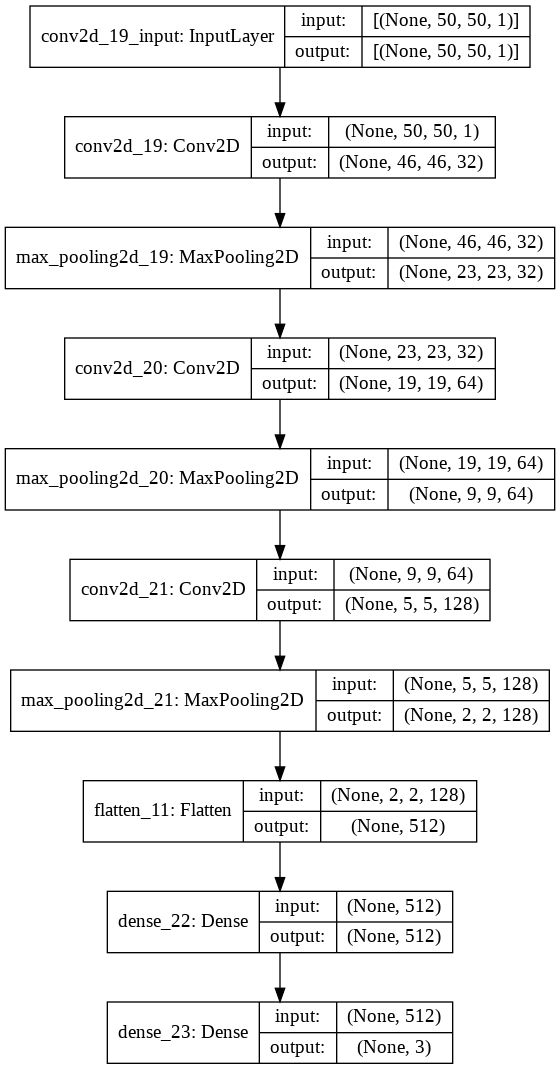

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
with tf.device('/device:GPU:0'):    
      model = tf.keras.Sequential(
      [
        
        tf.keras.layers.Conv2D(32, (5, 5), input_shape = (50, 50, 1), activation = 'relu'), # no bias necessary before batch norm
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 512, activation = 'relu'),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])

      model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 16928)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               8667648   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 513       
Total params: 8,668,993
Trainable params: 8,668,993
Non-trainable params: 0
_________________________________________________________________


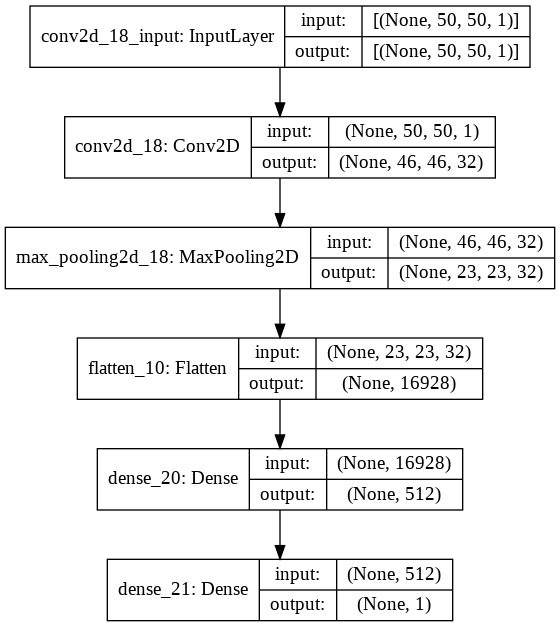

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import *
mc=ModelCheckpoint('plant_gpu.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)  
start_time=time.time()
history = model.fit(train_X,train_y, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,validation_data=(test_X,test_y),batch_size=BATCH_SIZE,callbacks=[mc])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/29
26/26 [==============================] - 9s 344ms/step - loss: 0.9688 - accuracy: 0.5303 - val_loss: 0.6849 - val_accuracy: 0.6195

Epoch 00001: val_accuracy improved from -inf to 0.61949, saving model to plant_gpu.h5
Epoch 2/29
26/26 [==============================] - 9s 344ms/step - loss: 0.6521 - accuracy: 0.6007 - val_loss: 0.6348 - val_accuracy: 0.6613

Epoch 00002: val_accuracy improved from 0.61949 to 0.66125, saving model to plant_gpu.h5
Epoch 3/29
26/26 [==============================] - 9s 341ms/step - loss: 0.5627 - accuracy: 0.7265 - val_loss: 0.5468 - val_accuracy: 0.7448

Epoch 00003: val_accuracy improved from 0.66125 to 0.74478, saving model to plant_gpu.h5
Epoch 4/29
26/26 [==============================] - 9s 343ms/step - loss: 0.4503 - accuracy: 0.8137 - val_loss: 0.4624 - val_accuracy: 0.7889

Epoch 00004: val_accuracy improved from 0.74478 to 0.78886, saving model to plant_gpu.h5
Epoch 5/29
26/26 [==============================] - 9s 343ms/step - loss: 0

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('plant_gpu.h5')
c=0
t=0
for i in range(len(test_X1)):
  test_image = np.expand_dims(test_X1[i], axis = 0)
  result=model.predict(test_image)
  if result[0]<0.5 and test_y1[i]==0:
    c+=1
  if result[0]>=0.5 and test_y1[i]==1:
    c+=1
  t+=1

In [ ]:
c/t

0.9048723897911833

In [ ]:
import pickle

In [ ]:
with open("maskBinary.txt", "wb") as fp:   
   pickle.dump(d, fp)

In [ ]:
with open("/content/drive/MyDrive/Datasets/maskBinary.txt", "rb") as fp:
  d = pickle.load(fp)

In [ ]:
d

[(array([[[166.],
          [177.],
          [181.],
          ...,
          [148.],
          [164.],
          [140.]],
  
         [[152.],
          [186.],
          [174.],
          ...,
          [165.],
          [133.],
          [137.]],
  
         [[180.],
          [195.],
          [207.],
          ...,
          [144.],
          [146.],
          [143.]],
  
         ...,
  
         [[213.],
          [213.],
          [211.],
          ...,
          [187.],
          [184.],
          [185.]],
  
         [[210.],
          [210.],
          [209.],
          ...,
          [183.],
          [178.],
          [181.]],
  
         [[209.],
          [208.],
          [206.],
          ...,
          [187.],
          [182.],
          [179.]]], dtype=float32), [0, 1, 0]), (array([[[156.],
          [165.],
          [142.],
          ...,
          [171.],
          [147.],
          [159.]],
  
         [[159.],
          [148.],
          [151.],
          ...,
